[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


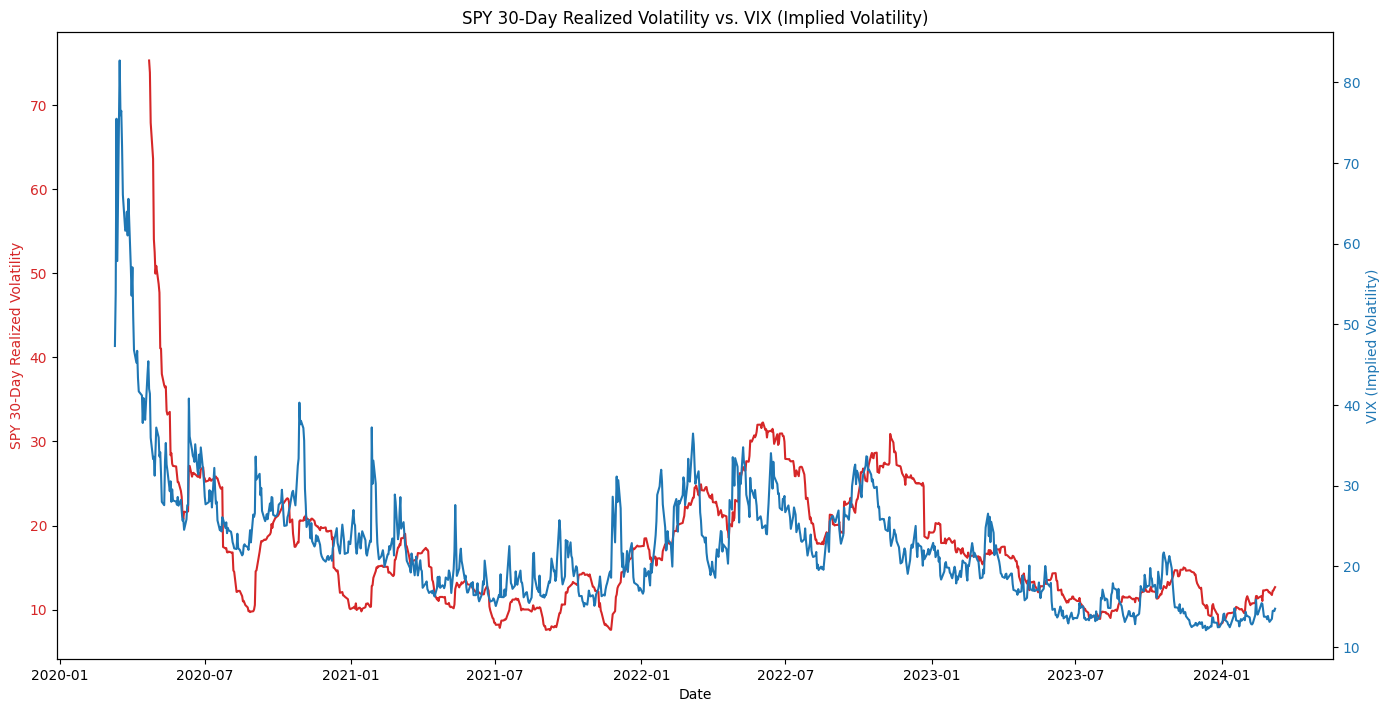

In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from dateutil.relativedelta import relativedelta

# set params
end = date.today()
start = end - relativedelta(years=4)
end = date.today()

# Fetch historical data for SPY (proxy for SPX) and VIX
spy = yf.download('SPY', start=start, end=end)
vix = yf.download('^VIX', start=start, end=end)

# Calculate daily returns for SPY
spy['Daily Returns'] = spy['Adj Close'].pct_change()

# Calculate the 30-day realized volatility for SPY
spy['30D RV'] = spy['Daily Returns'].rolling(window=30).std() * np.sqrt(252) * 100  # Annualize

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('SPY 30-Day Realized Volatility', color=color)
ax1.plot(spy.index, spy['30D RV'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('VIX (Implied Volatility)', color=color)  # we already handled the x-label with ax1
ax2.plot(vix.index, vix['Adj Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('SPY 30-Day Realized Volatility vs. VIX (Implied Volatility)')
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/var/folders/js/7n8nj6nd4kjgxzdzxr2pt65r0000gn/T/ipykernel_36110/807717289.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vix_data.rename(columns={'Adj Close': 'Implied Volatility'}, inplace=True)
/var/folders/js/7n8nj6nd4kjgxzdzxr2pt65r0000gn/T/ipykernel_36110/807717289.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vix_data['Implied Volatility'] = vix_data['Implied Volatility'] / 100


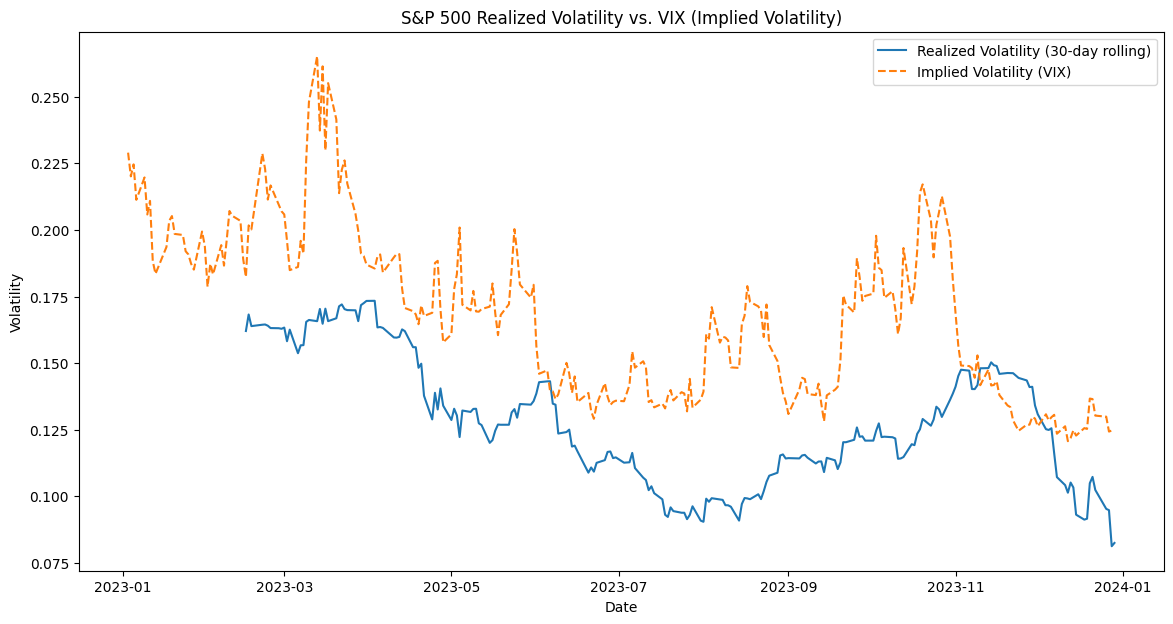

In [16]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fetch historical data for S&P 500
spx_data = yf.download('^GSPC', start='2023-01-01', end='2023-12-31')

# Calculate daily returns for SPX
spx_data['Daily Returns'] = spx_data['Adj Close'].pct_change()

# Calculate realized volatility for SPX (annualized)
spx_data['Realized Volatility'] = spx_data['Daily Returns'].rolling(window=30).std() * np.sqrt(252)

# Fetch historical VIX data as a proxy for implied volatility
vix_data = yf.download('^VIX', start='2023-01-01', end='2023-12-31')
vix_data = vix_data[['Adj Close']]
vix_data.rename(columns={'Adj Close': 'Implied Volatility'}, inplace=True)

# Convert VIX levels to volatility percentage
vix_data['Implied Volatility'] = vix_data['Implied Volatility'] / 100

# Merge the VIX data (implied volatility) with SPX data (realized volatility)
spx_vix_combined = spx_data[['Realized Volatility']].join(vix_data, how='inner')

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(spx_vix_combined.index, spx_vix_combined['Realized Volatility'], label='Realized Volatility (30-day rolling)')
plt.plot(spx_vix_combined.index, spx_vix_combined['Implied Volatility'], label='Implied Volatility (VIX)', linestyle='--')
plt.title('S&P 500 Realized Volatility vs. VIX (Implied Volatility)')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()
